# Check lfp traces correlations

# Setup

Setup Jupyter notebook's kernel based on python env setup with `requirements_silico.txt` (see comments in file for setup)

In [1]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pprint as pp
import pandas as pd
import yaml
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.widgets as sw
import spikeinterface.postprocessing as spost
from probeinterface.plotting import plot_probe
from spikeinterface.comparison import GroundTruthStudy
import shutil
from datetime import datetime
pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"

os.chdir(PROJ_PATH)
from src.nodes.io.silico.loading import load_campaign_params
from src.nodes.truth.silico import ground_truth
from src.nodes.io.silico import loading_raw_recording
from src.nodes.prepro import preprocess
from src.nodes.utils import get_config, write_metadata
from src.nodes.postpro import waveform


# SET PARAMETERS
EXPERIMENT = "supp/silico_reyes"    # specifies the experiment 
SIMULATION_DATE = "2023_01_13" # specifies the run (date)


# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# set output figure paths
FIG_PATH = data_conf["figures"]["silico"]["lfp_traces_corr"]

2023-02-10 10:03:07,347 - root - utils.py - get_config - INFO - Reading experiment config.
2023-02-10 10:03:07,382 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [2]:
# load the raw lfp recording (slow)
trace = loading_raw_recording.load(data_conf, param_conf)

/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/nptyping/typing_.py:51: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  Bool8 = np.bool8
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/nptyping/typing_.py:54: DeprecationWarning: `np.object0` is a deprecated alias for ``np.object0` is a deprecated alias for `np.object_`. `object` can be used instead.  (Deprecated NumPy 1.24)`.  (Deprecated NumPy 1.24)
  Object0 = np.object0
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/nptyping/typing_.py:66: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Int0 = np.int0
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/nptyping/typing_.py:80: DeprecationWarning: `np.uint0` is a deprecated alias for `np.uin

**Nearby channel trace correlations**

```diff
- Results: we validated that nearby contact traces (values closest to the diagonals) are more correlated (warmest colors) than distant ones (off-diagonal, coldest colors).
```

legend: pairwise pearson correlation (r) between channels.


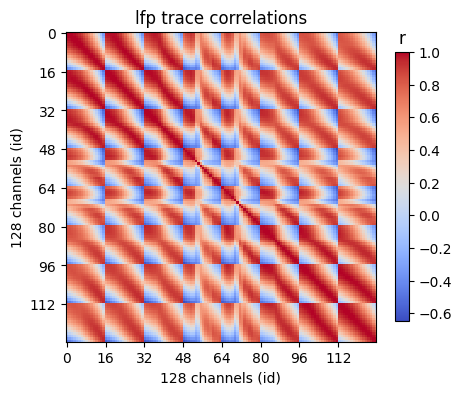

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
traces = trace.get_traces()
df = pd.DataFrame(np.corrcoef(traces.T))
pos = ax.matshow(df.corr(), cmap="coolwarm")
ax.xaxis.tick_bottom()
ax.set_xlabel("128 channels (id)")
ax.set_xticks(np.arange(0, 128, 16))
ax.set_xticklabels(np.arange(0, 128, 16))
ax.set_ylabel("128 channels (id)")
ax.set_yticks(np.arange(0, 128, 16))
ax.set_yticklabels(np.arange(0, 128, 16))
ax.set_title("lfp trace correlations")
cbar = fig.colorbar(pos, shrink=0.7)
cbar.ax.set_title("r")
print("legend: pairwise pearson correlation (r) between channels.")

In [4]:
# save figure
fig.savefig(FIG_PATH + ".png")

# write metadata
metadata = {
    "fig_path": FIG_PATH,
    "creation_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
    "simulation_date": SIMULATION_DATE,
    "data_conf": data_conf,
    "param_conf": param_conf,
}
write_metadata(metadata, FIG_PATH)

# References

(1) https://probeinterface.readthedocs.io/en/stable/examples/ex_05_device_channel_indices.html 

(2) https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html 